# PART A

In [2]:
#Importing all Libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns

# Exploratory Data Analysis

In [3]:
#Loading the dataset
df=pd.read_csv('CE802_P3_Data.csv')
df.shape

(1500, 37)

In [5]:
# Converting Ordinal Variable Rating to numeric
dummy_df = pd.get_dummies(df, columns=['F34'],drop_first=True)
df=dummy_df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   F1        1500 non-null   float64
 1   F2        1500 non-null   float64
 2   F3        1500 non-null   float64
 3   F4        1500 non-null   float64
 4   F5        1500 non-null   object 
 5   F6        1500 non-null   float64
 6   F7        1500 non-null   float64
 7   F8        1500 non-null   float64
 8   F9        1500 non-null   float64
 9   F10       1500 non-null   float64
 10  F11       1500 non-null   float64
 11  F12       1500 non-null   float64
 12  F13       1500 non-null   float64
 13  F14       1500 non-null   float64
 14  F15       1500 non-null   float64
 15  F16       1500 non-null   float64
 16  F17       1500 non-null   float64
 17  F18       1500 non-null   float64
 18  F19       1500 non-null   float64
 19  F20       1500 non-null   float64
 20  F21       1500 non-null   floa

In [8]:
#Replacing string to numerical variable
df['F5'].replace(['Very low', 'Low','Medium','High','Very high'],[0,1,2,3,4], inplace= True)

In [9]:
df.drop_duplicates()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F30,F31,F32,F33,F35,F36,Target,F34_Rest,F34_UK,F34_USA
0,25.46,-225.08,-177.02,137.97,4,4.08,-140.19,15882.39,-3728.44,-145.22,...,-76.74,-2.16,4.84,20.70,-413.31,-1451.18,3179.17,0,0,1
1,60.52,-209.14,-202.85,85.50,4,16.80,-248.01,10796.76,-2575.88,-233.30,...,-55.38,-3.84,11.47,20.94,-242.97,-1583.66,2784.99,0,0,0
2,9.27,-319.00,-185.33,61.49,1,9.12,-151.20,8993.31,-4532.70,-176.56,...,-82.86,-12.90,1.95,17.37,-257.25,-1360.91,1174.61,0,0,0
3,-41.74,-233.16,-206.10,114.58,4,19.23,-161.76,8527.65,-4896.54,-108.32,...,-62.67,-9.26,16.53,16.41,-419.46,-744.03,453.84,0,0,0
4,68.15,-279.80,-172.72,95.61,0,12.33,-162.03,17019.57,-4590.98,-143.82,...,-76.35,-11.68,13.95,18.87,-353.49,-1026.62,-402.80,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,70.79,-225.74,-201.90,162.08,1,11.04,-148.25,7794.72,-4582.26,-180.58,...,-78.15,-5.34,10.01,15.35,-79.23,-905.29,53.25,1,0,0
1496,59.05,-214.08,-128.57,110.34,3,-8.28,-175.39,6060.99,-6426.56,-192.32,...,-82.47,-10.34,11.87,14.45,-201.72,-1895.12,1187.95,0,1,0
1497,243.56,-174.58,-263.71,84.18,3,7.98,-150.14,20032.29,-4297.92,-117.52,...,-78.84,-8.90,7.26,25.31,-351.69,-1088.71,3770.53,0,0,1
1498,50.60,-210.96,-147.14,115.88,1,16.80,-231.52,8320.47,-3040.20,-208.70,...,-87.18,-3.12,4.50,19.78,-370.32,-1875.01,653.00,0,0,0


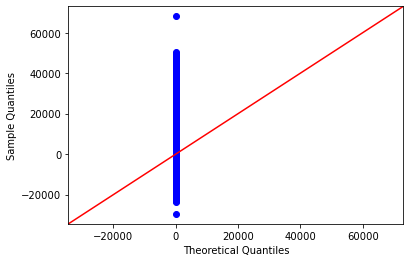

In [10]:

import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df, line='45')
plt.show()


In [11]:
#Scaling of features
from scipy.stats import zscore
scaled_data = df.apply(zscore)

In [12]:
x1 = scaled_data.drop(['Target'], axis=1)
y1= scaled_data['Target']

# Splitting the dataset into Train and Test

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 100)

#  PART 3A

#    LINEAR REGRESSION

In [16]:
#Cross validation being performed to achieve best hyperparameters
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Model Performance

In [75]:
y_pred=lr.predict(x_test)
lr_r2=r2_score(y_test,y_pred)
print("R2_Score",lr_r2)
lr_mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error",lr_mse)
lr_mae=mean_absolute_error(y_test,y_pred)
print("Mean_Absolute_Error",lr_mae)

R2_Score 0.715180387679268
Mean_Squared_Error 0.26204503318207095
Mean_Absolute_Error 0.4128957436887381


# PART 3B

# LASSO REGRESSION

In [54]:
#Cross validation being performed to achieve best hyperparameters
from sklearn.linear_model import Lasso

parameter={'alpha':[0.01,0.02,0.2,0.5,0.6,0.7,0.8,1,20,30]}
lasso_reg=Lasso()
grid_las= GridSearchCV(estimator=lasso_reg, param_grid=parameter, cv=5)
grid_las.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.02, 0.2, 0.5, 0.6, 0.7, 0.8, 1, 20,
                                   30]})

In [55]:
grid_las.best_params_

{'alpha': 0.02}

# Model Performance

In [74]:
y_pred=grid_las.predict(x_test)
las_r2=r2_score(y_test,y_pred)
print("R2_Score",las_r2)
las_mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error",las_mse)
las_mae=mean_absolute_error(y_test,y_pred)
print("Mean_Absolute_Error",las_mae)

R2_Score 0.7079864429439873
Mean_Squared_Error 0.2686637399189644
Mean_Absolute_Error 0.4177815071129089


# RIDGE REGRESSION


In [22]:
#Model Tuning
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV
parameter={'alpha':[0.01,0.02,0.2,0.5,0.6,0.7,0.8,1,20,30]}
ridge=Ridge()
grid= GridSearchCV(estimator=ridge, param_grid=parameter, cv=5)
grid.fit(x_train,y_train)




GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.02, 0.2, 0.5, 0.6, 0.7, 0.8, 1, 20,
                                   30]})

In [23]:
#Best parameters after cross validation
grid.best_params_

{'alpha': 30}

# Model Performance

In [73]:
#Model Evaluation
y_pred=grid.predict(x_test)
rd_r2=r2_score(y_test,y_pred)
print("R2_SCORE",rd_r2)
rd_mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error",rd_mse)
rd_mae=mean_absolute_error(y_test,y_pred)
print("Mean_Absolute_Error",rd_mae)

R2_SCORE 0.7133226109608608
Mean_Squared_Error 0.26375425944585673
Mean_Absolute_Error 0.4142196060051263


# MODEL COMPARISON

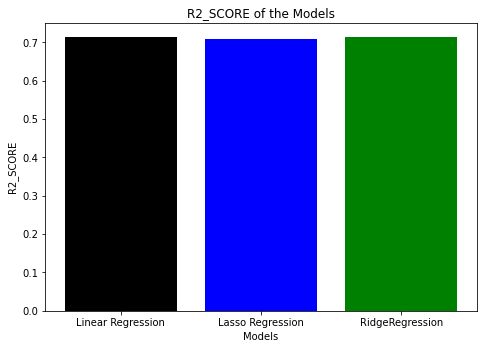

In [72]:
fig = plt.figure()
ax = fig.add_axes([0,1,1,1]) 
ax.bar(['Linear Regression', 'Lasso Regression', 'RidgeRegression'],[lr_r2,las_r2, rd_r2],color=['black', 'blue', 'green'])
plt.xlabel('Models')
plt.ylabel('R2_SCORE')
plt.title('R2_SCORE of the Models')
plt.show()

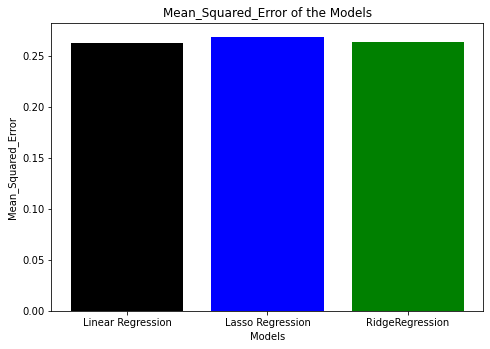

In [76]:
fig = plt.figure()
ax = fig.add_axes([0,1,1,1]) 
ax.bar(['Linear Regression', 'Lasso Regression', 'RidgeRegression'],[lr_mse,las_mse, rd_mse],color=['black', 'blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean_Squared_Error')
plt.title('Mean_Squared_Error of the Models')
plt.show()

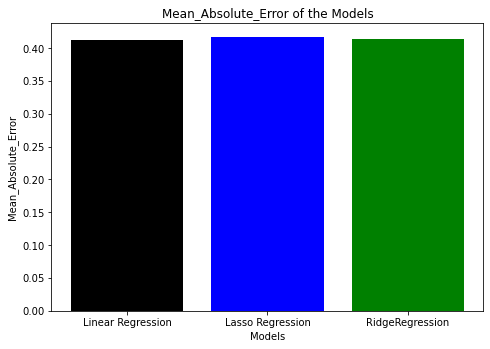

In [78]:
fig = plt.figure()
ax = fig.add_axes([0,1,1,1]) 
ax.bar(['Linear Regression', 'Lasso Regression', 'RidgeRegression'],[lr_mae,las_mae, rd_mae],color=['black', 'blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean_Absolute_Error')
plt.title('Mean_Absolute_Error of the Models')
plt.show()

# PART B

In [ ]:
#linear Regression was implemented as the model provided best performance

In [79]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')



In [80]:
# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()



In [81]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [82]:
X_test=test_df.loc[:,test_df.columns!="Target"]

In [83]:
# Converting Ordinal Variable Rating to numeric
X_test  = pd.get_dummies(X_test , columns=['F34'],drop_first=True)

In [84]:
X_test['F5'].replace(['Very low', 'Low','Medium','High','Very high'],[0,1,2,3,4], inplace= True)

In [85]:
X_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F29,F30,F31,F32,F33,F35,F36,F34_Rest,F34_UK,F34_USA
0,43.32,-186.00,-222.53,87.83,3,14.85,-109.49,5648.04,-3589.64,-196.44,...,2028.74,-73.92,-6.70,7.88,17.80,-192.90,-912.06,0,0,0
1,40.06,-80.16,-233.96,78.11,0,19.47,-147.48,19604.82,-6077.54,-150.54,...,197.22,-74.04,-3.36,14.71,12.56,-272.52,-1500.16,0,1,0
2,13.19,-173.50,-173.52,95.18,3,-19.47,-162.54,19426.29,-4573.22,-162.06,...,1210.08,-60.42,-2.34,15.36,17.69,-304.50,-1674.76,1,0,0
3,55.10,-45.82,-236.11,128.31,2,16.05,-150.76,19828.65,-4126.90,-88.62,...,940.92,-112.68,-5.30,9.24,18.61,-399.24,-1074.56,0,0,0
4,-5.31,-234.50,-179.52,137.01,2,15.78,-109.02,12212.55,-4805.98,-140.72,...,950.14,-95.40,-2.26,20.73,18.49,-254.19,-1013.19,0,0,0


In [86]:
predicted =lr.predict(X_test)
# CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

In [87]:


# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted



In [88]:
# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')



In [89]:
# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])

In [90]:
test_df.to_csv('CE802_P3_Test.csv', index=False, float_format='%.8g')